In [57]:
import torch
torch.__version__


'2.4.0'

In [58]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import numpy as np
import matplotlib.pyplot as plt



In [59]:
import pandas as pd
import seaborn as sns


In [60]:
df = pd.read_csv("marketing_customer_analysis_clean (1).csv")

In [61]:
df.head(10)

,unnamed:_0,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,...,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,vehicle_type,month
0,0,DK49336,Arizona,4809.216960,No,Basic,College,2011-02-18,Employed,M,...,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,A,2
1,1,KX64629,California,2228.525238,No,Basic,College,2011-01-18,Unemployed,F,...,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,A,1
2,2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2011-02-10,Employed,M,...,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A,2
3,3,XL78013,Oregon,22332.439460,Yes,Extended,College,2011-01-11,Employed,M,...,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A,1
4,4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,2011-01-17,Medical Leave,F,...,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,A,1
5,5,HO81102,California,4745.181764,No,Basic,High School or Below,2011-02-14,Employed,M,...,7,Personal Auto,Personal L3,Offer1,Agent,292.800000,Four-Door Car,Medsize,A,2
6,6,IW72280,California,5035.035257,No,Basic,Doctor,2011-02-14,Employed,F,...,4,Corporate Auto,Corporate L2,Offer2,Branch,287.556107,Four-Door Car,Medsize,A,2
7,7,IH64929,California,4956.247235,No,Basic,High School or Below,2011-02-24,Employed,M,...,3,Personal Auto,Personal L2,Offer2,Branch,247.402353,Two-Door Car,Medsize,A,2
8,8,FM55990,California,5989.773931,Yes,Premium,College,2011-01-19,Employed,M,...,1,Personal Auto,Personal L1,Offer2,Branch,739.200000,Sports Car,Medsize,A,1
9,9,QX31376,Oregon,17114.328150,No,Extended,Master,2011-01-04,Employed,F,...,2,Corporate Auto,Corporate L3,Offer2,Agent,408.000000,Four-Door Car,Small,A,1


In [62]:
df.columns

Index(['unnamed:_0', 'customer', 'state', 'customer_lifetime_value',
       'response', 'coverage', 'education', 'effective_to_date',
       'employmentstatus', 'gender', 'income', 'location_code',
       'marital_status', 'monthly_premium_auto', 'months_since_last_claim',
       'months_since_policy_inception', 'number_of_open_complaints',
       'number_of_policies', 'policy_type', 'policy', 'renew_offer_type',
       'sales_channel', 'total_claim_amount', 'vehicle_class', 'vehicle_size',
       'vehicle_type', 'month'],
      dtype='object')

In [63]:
print(df.dtypes)


unnamed:_0                         int64
customer                          object
state                             object
customer_lifetime_value          float64
response                          object
coverage                          object
education                         object
effective_to_date                 object
employmentstatus                  object
gender                            object
income                             int64
location_code                     object
marital_status                    object
monthly_premium_auto               int64
months_since_last_claim          float64
months_since_policy_inception      int64
number_of_open_complaints        float64
number_of_policies                 int64
policy_type                       object
policy                            object
renew_offer_type                  object
sales_channel                     object
total_claim_amount               float64
vehicle_class                     object
vehicle_size    

In [64]:
df["month"]

0        2
1        1
2        2
3        1
4        1
        ..
10905    1
10906    1
10907    2
10908    2
10909    1
Name: month, Length: 10910, dtype: int64

In [65]:
columns_to_drop =["customer", "unnamed:_0","state","month", "vehicle_type"]

In [66]:
df.drop(columns=columns_to_drop, inplace=True)


In [67]:
numeric_df = df.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numeric_df.corr()


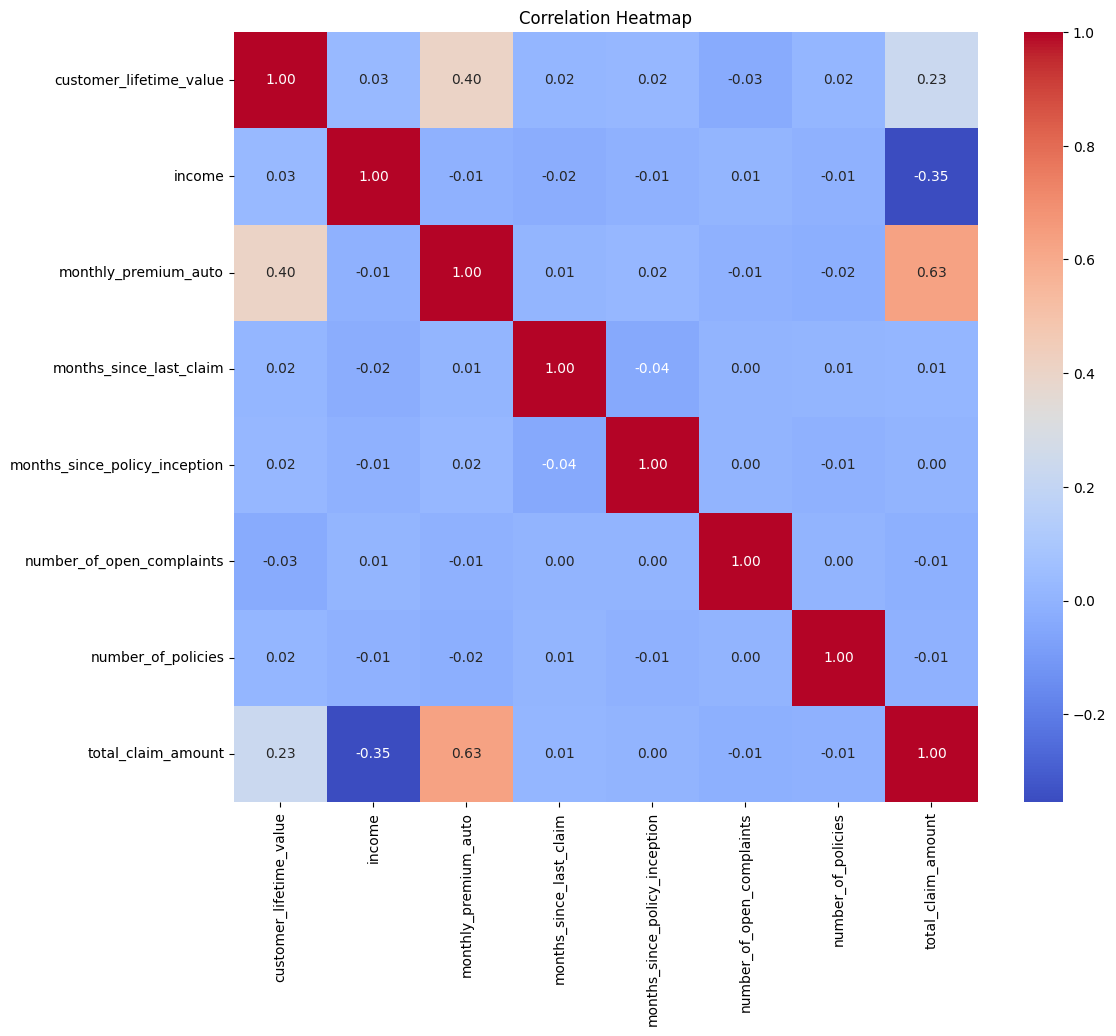

In [68]:
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

In [69]:
print(correlation_matrix)

                               customer_lifetime_value    income  \
customer_lifetime_value                       1.000000  0.028306   
income                                        0.028306  1.000000   
monthly_premium_auto                          0.403069 -0.009788   
months_since_last_claim                       0.015683 -0.023126   
months_since_policy_inception                 0.016960 -0.005903   
number_of_open_complaints                    -0.031501  0.006956   
number_of_policies                            0.016024 -0.009960   
total_claim_amount                            0.232626 -0.354141   

                               monthly_premium_auto  months_since_last_claim  \
customer_lifetime_value                    0.403069                 0.015683   
income                                    -0.009788                -0.023126   
monthly_premium_auto                       1.000000                 0.008504   
months_since_last_claim                    0.008504                

## 1st Lineer Regression: After Feature Sellection with Only Numerical Colums 



In [70]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler

In [71]:
X = df[['customer_lifetime_value', 'income', 'monthly_premium_auto']]
y = df['total_claim_amount']


In [72]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [73]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [74]:
model = LinearRegression()
model.fit(X_train_scaled, y_train)


LinearRegression()

In [75]:
y_pred = model.predict(X_test_scaled)


In [76]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)



In [77]:
r2

0.5076661783468523

In [78]:
from sklearn.preprocessing import PolynomialFeatures
import pandas as pd

poly = PolynomialFeatures(degree=2, include_bias=False)


In [79]:

X = df[['customer_lifetime_value', 'income', 'monthly_premium_auto']]
y = df['total_claim_amount']

# Initialize PolynomialFeatures
poly = PolynomialFeatures(degree=2, include_bias=False)

# Transform the data
X_poly = poly.fit_transform(X)

# Create a DataFrame to see the new features
poly_feature_names = poly.get_feature_names_out(input_features=X.columns)
X_poly_df = pd.DataFrame(X_poly, columns=poly_feature_names)

print(X_poly_df.head())

   customer_lifetime_value   income  monthly_premium_auto  \
0              4809.216960  48029.0                  61.0   
1              2228.525238      0.0                  64.0   
2             14947.917300  22139.0                 100.0   
3             22332.439460  49078.0                  97.0   
4              9025.067525  23675.0                 117.0   

   customer_lifetime_value^2  customer_lifetime_value income  \
0               2.312857e+07                    2.309819e+08   
1               4.966325e+06                    0.000000e+00   
2               2.234402e+08                    3.309319e+08   
3               4.987379e+08                    1.096031e+09   
4               8.145184e+07                    2.136685e+08   

   customer_lifetime_value monthly_premium_auto      income^2  \
0                                  2.933622e+05  2.306785e+09   
1                                  1.426256e+05  0.000000e+00   
2                                  1.494792e+06  4.90

In [80]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [81]:
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)

# Create a pipeline with scaling and polynomial features
pipeline = make_pipeline(
    StandardScaler(),  # Standardize features
    LinearRegression() # Model
)

# Train the model
pipeline.fit(X_train, y_train)

# Predict and evaluate
y_pred = pipeline.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [82]:
print("mse= " + str(mse) + ",r2 =" +str(r2 ))

mse= 35232.24871748667,r2 =0.5636493607258173


## 2nd Lineer Regression Using encoded categorical values 


In [83]:
categorical_df = df.select_dtypes(include=['object'])

In [84]:
categorical_df.columns

Index(['response', 'coverage', 'education', 'effective_to_date',
       'employmentstatus', 'gender', 'location_code', 'marital_status',
       'policy_type', 'policy', 'renew_offer_type', 'sales_channel',
       'vehicle_class', 'vehicle_size'],
      dtype='object')

In [85]:
for x in categorical_df.columns:
    print(f"{x} : ")
    print (df[x].unique()  )
    

response : 
['No' 'Yes']
coverage : 
['Basic' 'Extended' 'Premium']
education : 
['College' 'Bachelor' 'High School or Below' 'Doctor' 'Master']
effective_to_date : 
['2011-02-18' '2011-01-18' '2011-02-10' '2011-01-11' '2011-01-17'
 '2011-02-14' '2011-02-24' '2011-01-19' '2011-01-04' '2011-01-02'
 '2011-02-07' '2011-01-31' '2011-01-26' '2011-02-28' '2011-01-16'
 '2011-02-26' '2011-02-23' '2011-01-15' '2011-02-02' '2011-02-15'
 '2011-01-24' '2011-02-21' '2011-02-22' '2011-01-07' '2011-01-28'
 '2011-02-08' '2011-02-12' '2011-02-20' '2011-01-05' '2011-02-19'
 '2011-01-03' '2011-02-03' '2011-01-22' '2011-01-23' '2011-02-05'
 '2011-02-13' '2011-01-25' '2011-02-16' '2011-02-01' '2011-01-27'
 '2011-01-12' '2011-01-20' '2011-02-06' '2011-02-11' '2011-01-21'
 '2011-01-29' '2011-01-09' '2011-02-09' '2011-02-27' '2011-01-01'
 '2011-02-17' '2011-02-25' '2011-01-13' '2011-01-06' '2011-02-04'
 '2011-01-14' '2011-01-10' '2011-01-08' '2011-01-30']
employmentstatus : 
['Employed' 'Unemployed' 'Medical 

In [86]:
one_hot_encoded_columns = ["response", "employmentstatus", "gender", "marital_status", "policy_type", "policy", "renew_offer_type","sales_channel", "vehicle_class","location_code"  ]
label_encoded_columns = ["vehicle_size"]

In [51]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder


In [87]:
df_one_hot_encoded = pd.get_dummies(df, columns=one_hot_encoded_columns, drop_first=True)

In [88]:
size_labels = {'Small': 1, 'Medsize': 2, 'Large': 3}
df_one_hot_encoded['vehicle_size_encoded'] = df['vehicle_size'].map(size_labels)
df_one_hot_encoded = df_one_hot_encoded.drop(columns=['vehicle_size'])


In [96]:
df_combined = pd.concat([df_one_hot_encoded, df_one_hot_encoded['vehicle_size_encoded']], axis=1)
df_one_hot_encoded = pd.concat([df_combined, df['total_claim_amount']], axis=1)

In [98]:
df_one_hot_encoded.drop(columns = ["coverage", "education", "effective_to_date"], inplace=True )


In [106]:
df_one_hot_encoded.columns


Index(['customer_lifetime_value', 'income', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies', 'total_claim_amount',
       'response_Yes', 'employmentstatus_Employed',
       'employmentstatus_Medical Leave', 'employmentstatus_Retired',
       'employmentstatus_Unemployed', 'gender_M', 'marital_status_Married',
       'marital_status_Single', 'policy_type_Personal Auto',
       'policy_type_Special Auto', 'policy_Corporate L2',
       'policy_Corporate L3', 'policy_Personal L1', 'policy_Personal L2',
       'policy_Personal L3', 'policy_Special L1', 'policy_Special L2',
       'policy_Special L3', 'renew_offer_type_Offer2',
       'renew_offer_type_Offer3', 'renew_offer_type_Offer4',
       'sales_channel_Branch', 'sales_channel_Call Center',
       'sales_channel_Web', 'vehicle_class_Luxury Car',
       'vehicle_class_Luxury SUV', 'vehicle_class_SUV',
       'vehicle_class_Sports Car', '

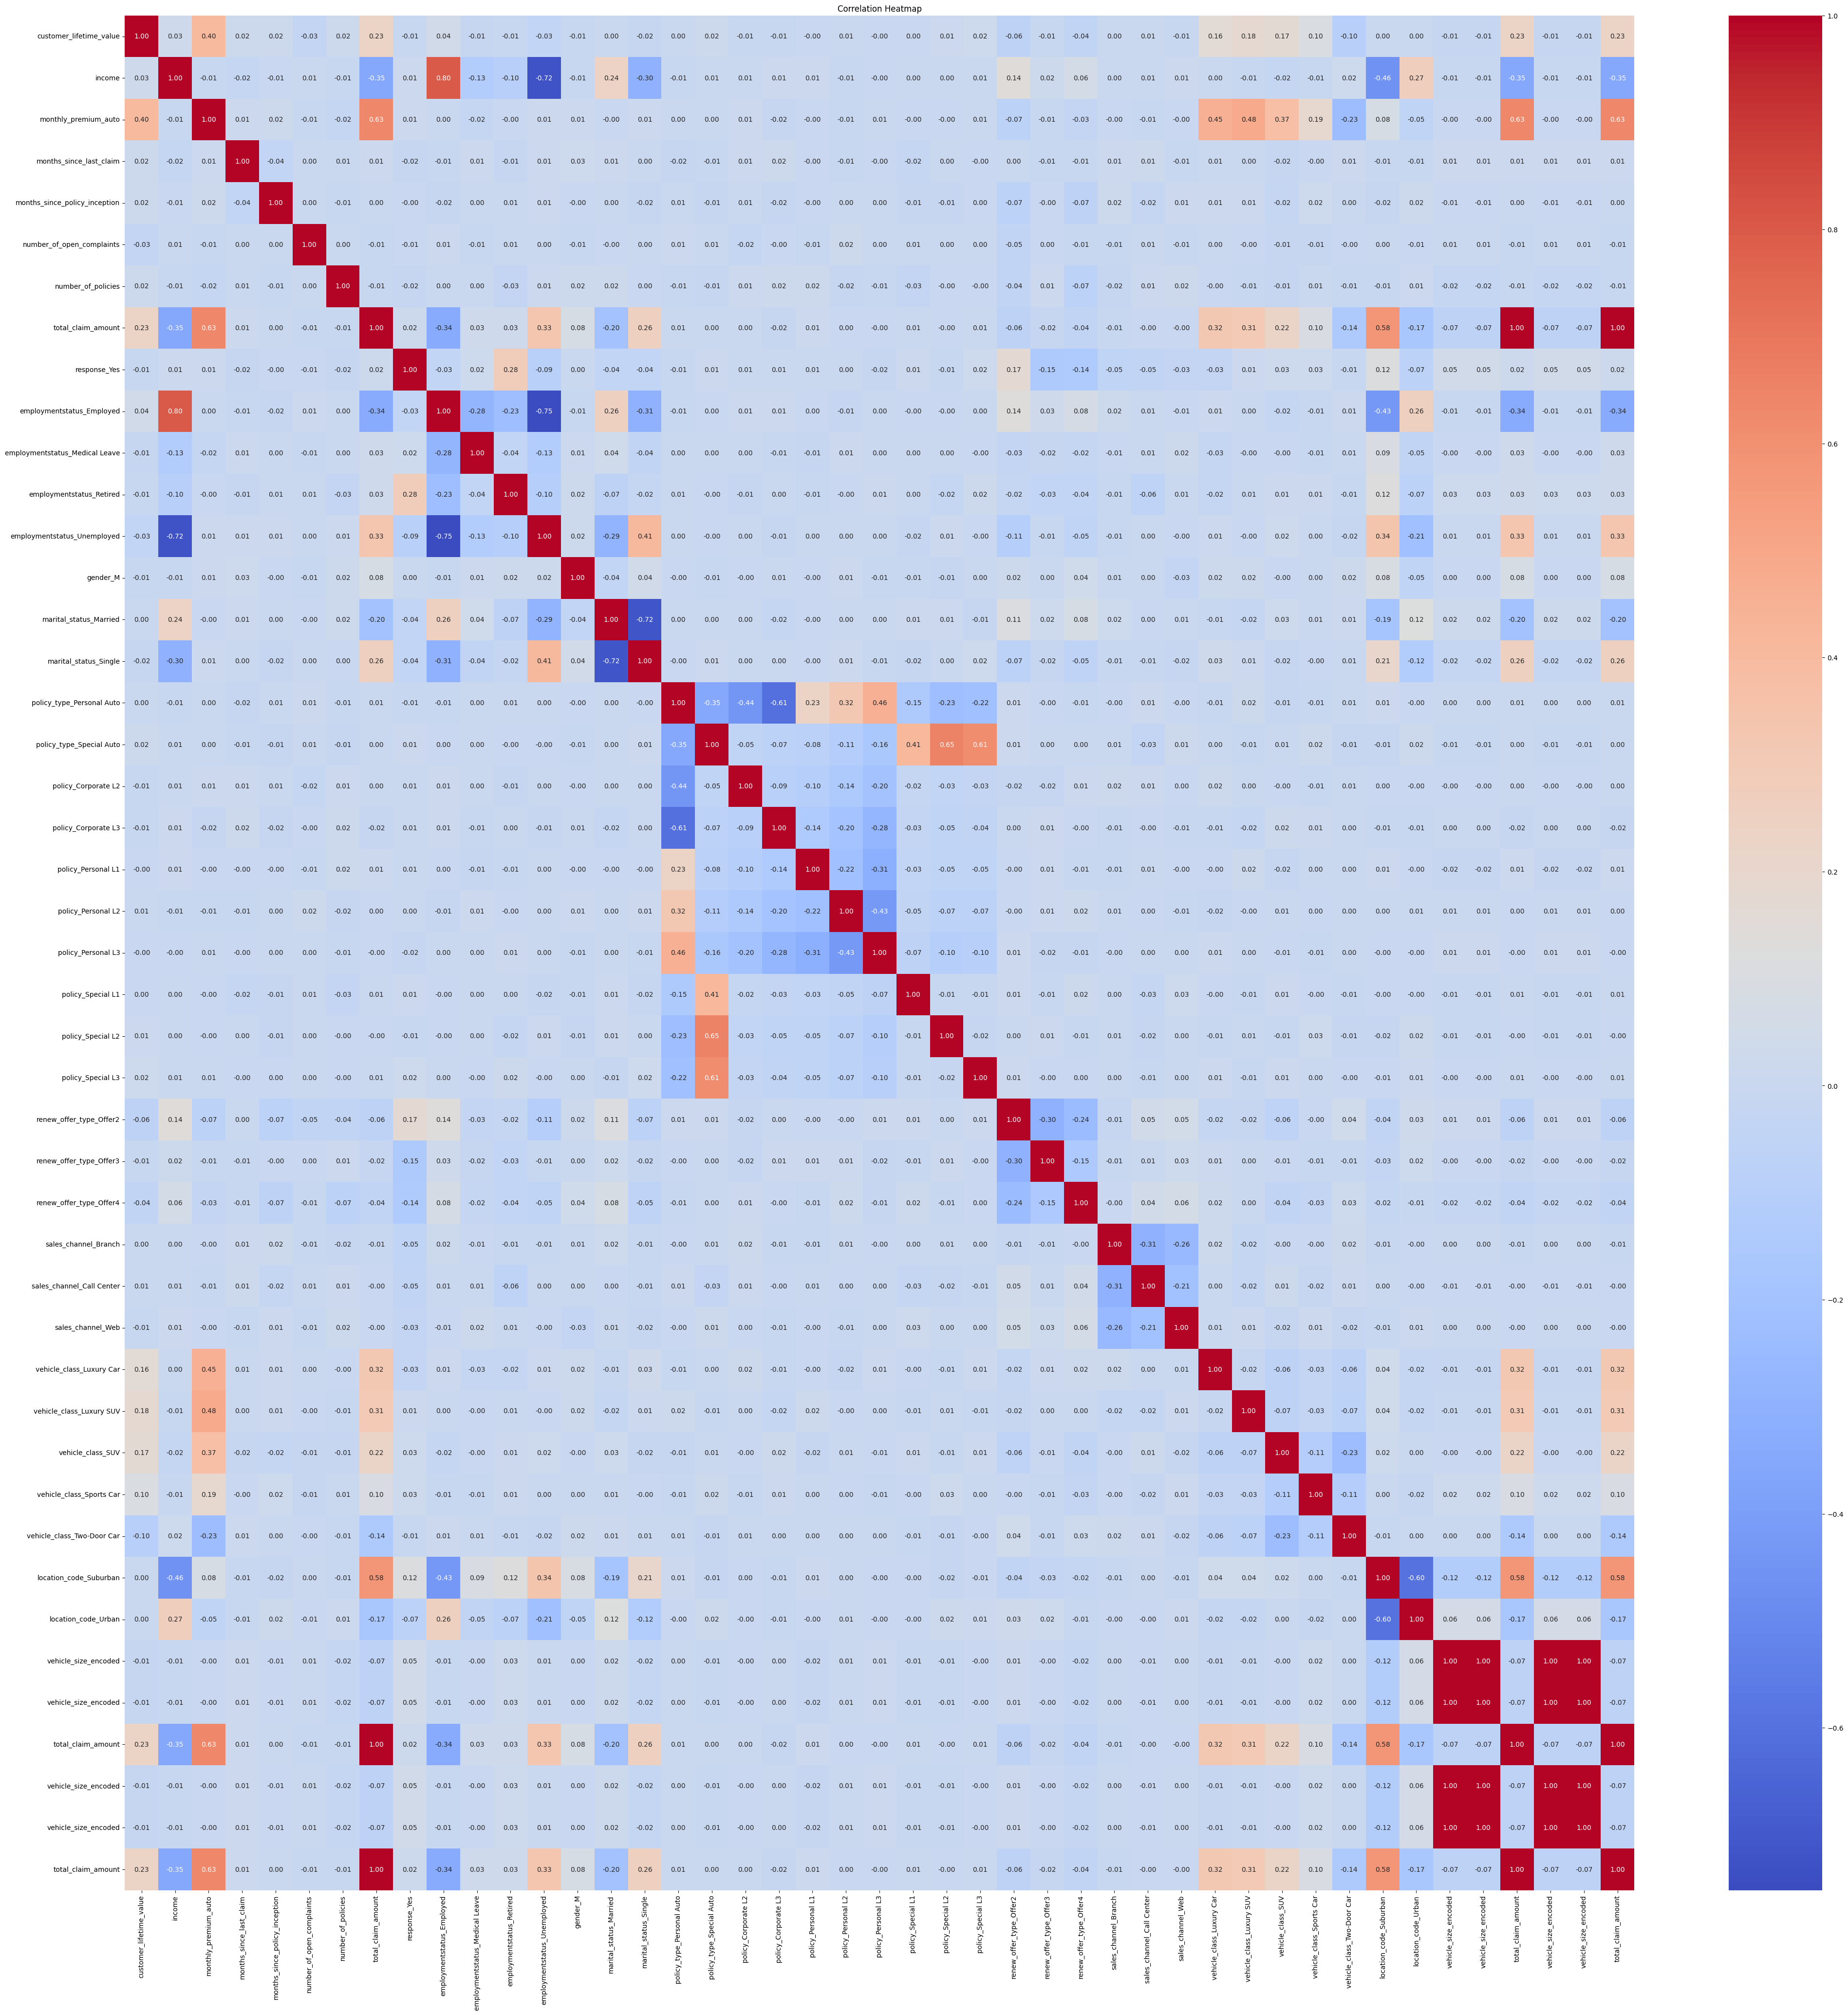

In [99]:
correlation_matrix2 = df_one_hot_encoded.corr()
plt.figure(figsize=(50, 50))
sns.heatmap(correlation_matrix2, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

customer_lifetime_value
coverage
income
monthly_premium_auto


employmentstatus_1
employmentstatus_2
employmentstatus_3
employmentstatus_4

marital_status_1
marital_status_2

locationcode_1
locationcode_2


(veichle_class_1 ,2,3,4 is not in my features because they are higyl coraleted with income. And I take income)


In [100]:
features = ['customer_lifetime_value', 'coverage', 'income', 'monthly_premium_auto',
             'employmentstatus_1', 'employmentstatus_2', 'employmentstatus_3', 'employmentstatus_4',
             'marital_status_married', 'marital_status_single',
             'location_code_1', 'location_code_2']
target = 'total_claim_amount' 


In [104]:
X = df_one_hot_encoded[features]
y = df_one_hot_encoded[target]

KeyError: "['coverage', 'employmentstatus_1', 'employmentstatus_2', 'employmentstatus_3', 'employmentstatus_4', 'marital_status_1', 'marital_status_2', 'location_code_1', 'location_code_2'] not in index"

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

In [102]:
y_pred = model.predict(X_test)

ValueError: X has 9 features, but LinearRegression is expecting 3 features as input.

In [ ]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

## 3rd ) Neural Network with Pytorch


In [ ]:
X = df_one_hot_encoded[features]
y = df_one_hot_encoded[target]


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

#It has done the same steps until this point: Feature and Target selection, standart scaler, spliting the data into train and test
#Convert to PyTorch tensors

X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32).view(-1, 1)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32).view(-1, 1)


In [ ]:
import torch.nn as nn
class SimpleNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(SimpleNN, self).__init__()
        self.network = nn.Sequential(nn.Linear(input_size,hidden_size_1),
                                    nn.Linear(hidden_size,output_size_2)),
                                    nn.Linear(hidden_size,output_size))
    def forward(self, x):
        return self.network(x)

In [ ]:
input_size = len(df_one_hot_encoded[features].columns)
hidden_size_1 = 1000
hidden_size_2 = 1000
output_size = 1

model = SimpleNN(input_size, hidden_size, output_size)

In [ ]:
from torch import optim
# Define the loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training the model
epochs = 500
for epoch in range(epochs):
    model.train()  # Set the model to training mode

    # Forward pass
    outputs = model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)

    # Backward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (epoch+1) % 50 == 0:
        print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}')

In [ ]:
model.eval()  # This sets the model to evaluation mode
with torch.no_grad():
    predictions = model(X_test_tensor)
    test_loss = criterion(predictions, y_test_tensor)
    print(f'Test Loss: {test_loss.item():.4f}')

# Plotting our results
import matplotlib.pyplot as plt

plt.scatter(y_test, predictions.numpy(), alpha=0.5)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted Price')
plt.show()

In [ ]:
from sklearn.metrics import r2_score

# Evaluate the model
#model.eval()  # Set the model to evaluation mode
with torch.no_grad():
    predictions = model(X_test_tensor).numpy()
    actuals = y_test_tensor.numpy()

r2 = r2_score(actuals, predictions)
print(f'R2 score: {r2:.4f}')

## Experimenting with Neural Network 


In [ ]:
# First, split the data into training and test sets
X_train_full, X_test, y_train_full, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Now, further split the training data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size=0.2, random_state=42)

In [ ]:
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32).view(-1, 1)
X_val_tensor = torch.tensor(X_val, dtype=torch.float32)
y_val_tensor = torch.tensor(y_val.values, dtype=torch.float32).view(-1, 1)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32).view(-1, 1)

In [ ]:
# Training the model
epochs = 500
for epoch in range(epochs):
    model.train()  # Set the model to training mode

    # Forward pass on training data
    outputs = model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)

    # Backward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Evaluate on the validation set
    model.eval()  # Set the model to evaluation mode
    with torch.no_grad():
        val_outputs = model(X_val_tensor)
        val_loss = criterion(val_outputs, y_val_tensor)

    # Print loss for every 50th epoch
    if (epoch + 1) % 50 == 0:
        print(f'Epoch [{epoch+1}/{epochs}], Training Loss: {loss.item():.4f}, Validation Loss: {val_loss.item():.4f}')

In [ ]:
train_r2 = r2_score(y_train_tensor.cpu().numpy(), outputs.cpu().detach().numpy())
val_r2 = r2_score(y_val_tensor.cpu().numpy(), val_outputs.cpu().detach().numpy())


In [ ]:
train_r2

In [103]:
val_r2

NameError: name 'val_r2' is not defined

In [ ]:
model.eval()  # Set the model to evaluation mode
with torch.no_grad():
    # Make predictions on the test set
    test_outputs = model(X_test_tensor)
    
    # Calculate the test loss
    test_loss = criterion(test_outputs, y_test_tensor)
    
    # Calculate the R2 score for the test set
    test_r2 = r2_score(y_test_tensor.cpu().numpy(), test_outputs.cpu().numpy())

# Print the test loss and R2 score
print(f'Test Loss: {test_loss.item():.4f}')
print(f'Test R2 Score: {test_r2:.4f}')